<a href="https://colab.research.google.com/github/DotSlash-A/Pytorch/blob/main/logreg_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
import torch
from sklearn.datasets import make_classification

n = 1000
# You can try with 10,000 samples after doing 1,000
# n = 10000

dataset = make_classification(
  n_samples = n,
  n_features = 2,
  n_classes = 2,
  shuffle = True,
  n_informative = 2,
  n_redundant = 0
)
X_new = torch.tensor(dataset[0], dtype = torch.float32)
y_new = torch.tensor(dataset[1], dtype = torch.float32)

# To normalize the dataset
X_norm = (X_new - X_new.mean()) / X_new.std()

In [6]:
X_new

tensor([[ 1.5969, -0.4872],
        [-0.6483,  0.8080],
        [-1.2587, -0.7655],
        ...,
        [-1.6877,  2.3250],
        [ 1.3123, -0.7227],
        [-0.5905, -1.3288]])

In [4]:
X_norm

tensor([[ 1.1773, -0.3531],
        [-0.4715,  0.5980],
        [-0.9197, -0.5575],
        ...,
        [-1.2348,  1.7121],
        [ 0.9684, -0.5261],
        [-0.4290, -0.9713]])

In [5]:
y_new

tensor([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 0., 1., 1., 1., 

In [9]:
class logreg(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=torch.nn.Linear(2,1)

  def forward(self,x):
    out=self.linear(x)
    sigmoid=torch.sigmoid(out)
    return sigmoid


In [10]:
model=logreg()

In [12]:
optimizer= torch.optim.SGD(model.parameters(), lr = 0.05)

In [13]:
for epoch in range(25):
  model = model.train()
  for x_, y_ in zip(X_norm, y_new):
    pred=model(x_)
    loss=torch.nn.functional.binary_cross_entropy(pred,y_.view(1))
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
  print(f"Epoch: {epoch + 1} \t Loss: {loss:.3f}")



Epoch: 1 	 Loss: 0.084
Epoch: 2 	 Loss: 0.072
Epoch: 3 	 Loss: 0.071
Epoch: 4 	 Loss: 0.071
Epoch: 5 	 Loss: 0.071
Epoch: 6 	 Loss: 0.071
Epoch: 7 	 Loss: 0.071
Epoch: 8 	 Loss: 0.071
Epoch: 9 	 Loss: 0.071
Epoch: 10 	 Loss: 0.071
Epoch: 11 	 Loss: 0.071
Epoch: 12 	 Loss: 0.071
Epoch: 13 	 Loss: 0.071
Epoch: 14 	 Loss: 0.071
Epoch: 15 	 Loss: 0.071
Epoch: 16 	 Loss: 0.071
Epoch: 17 	 Loss: 0.071
Epoch: 18 	 Loss: 0.071
Epoch: 19 	 Loss: 0.071
Epoch: 20 	 Loss: 0.071
Epoch: 21 	 Loss: 0.071
Epoch: 22 	 Loss: 0.071
Epoch: 23 	 Loss: 0.071
Epoch: 24 	 Loss: 0.071
Epoch: 25 	 Loss: 0.071


In [15]:
def compute_accuracy(model,X,y):
  model=model.eval()
  correct = 0.0
  total_examples= 0
  for x_, y_ in zip(X, y):
    with torch.no_grad():
      pred=model(x_)

    pred_count=torch.where(pred>0.5,1,0)
    lab=y_.view(pred_count.shape).to(pred_count.dtype)
    compare = lab ==pred_count
    correct += torch.sum(compare)
    total_examples += len(compare)
  return correct/total_examples





In [17]:
train_acc = compute_accuracy(model, X_norm,y_new)

In [18]:
train_acc

tensor(0.8490)

In [19]:
def plot_boundary(model):
  w1 = model.linear.weight[0][0].detach()
  w2 = model.linear.weight[0][1].detach()
  b = model.linear.bias[0].detach()

  x1_min = -20
  x2_min = (-(w1 * x1_min) - b) / w2

  x1_max = 20
  x2_max = (-(w1 * x1_max) - b) / w2

  return x1_min, x1_max, x2_min, x2_max

In [21]:
import matplotlib.pyplot as plt


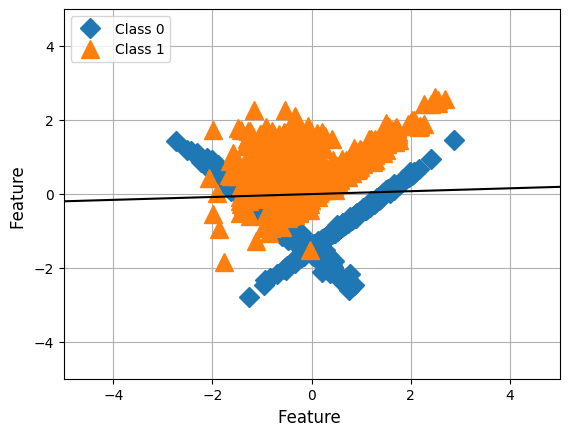

In [22]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(model)


plt.plot(
    X_norm[y_new == 0, 0],
    X_norm[y_new == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_norm[y_new == 1, 0],
    X_norm[y_new == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature ", fontsize=12)
plt.ylabel("Feature ", fontsize=12)

plt.grid()
plt.show()